In [1]:
%matplotlib inline
# Load the "autoreload" extension
%load_ext autoreload
# always reload modules
%autoreload 2
# black formatter for jupyter notebooks
# %load_ext nb_black
# black formatter for jupyter lab
%load_ext lab_black

%run ../../src/notebook_env.py


---------------------------------
Working on the host: imarevic-pc

---------------------------------
Python version: 3.10.9 | packaged by conda-forge | (main, Feb  2 2023, 20:20:04) [GCC 11.3.0]

---------------------------------
Python interpreter: /home/imarevic/anaconda3/envs/srh/bin/python


In [2]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import poisson

In [3]:
x_0 = poisson.pmf(0, mu=1)
x_0

0.36787944117144233

In [4]:
x_1 = poisson.pmf(1, mu=1)
x_1

0.36787944117144233

In [5]:
xge2 = 1 - x_1 - x_0
xge2

0.26424111765711533

In [6]:
1 - poisson.cdf(1, mu=1)

0.26424111765711533

In [7]:
x_0 + x_1 + xge2

1.0

Text(0, 0.5, 'Wahrscheinlichkeit (P=X)')

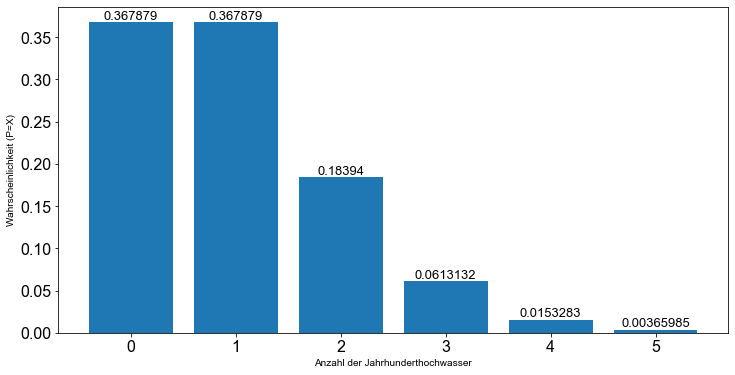

In [8]:
xs = [0, 1, 2, 3, 4, 5]
res = []

for x in xs:
    if x != 5:
        p = poisson.pmf(x, mu=1)
    else:
        p = 1 - poisson.cdf(4, mu=1)
    res.append(p)

fig, ax = plt.subplots()
ax.bar(xs, height=res)
_ = ax.bar_label(ax.containers[0], label_type="edge", size=13)

ax.set_xlabel("Anzahl der Jahrhunderthochwasser")
ax.set_ylabel("Wahrscheinlichkeit (P=X)")

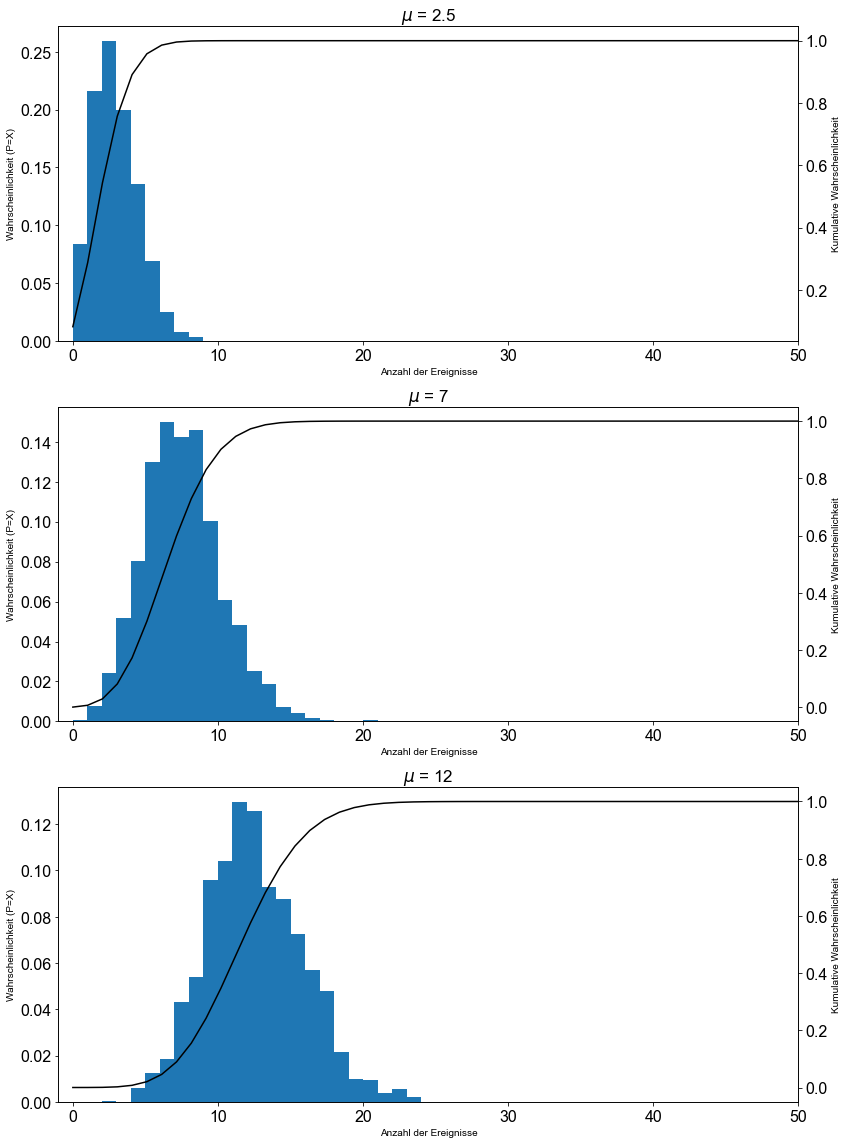

In [9]:
lambdas = [2.5, 7, 12]

fig, ax = plt.subplots(nrows=len(lambdas), figsize=(12, 16))
for e, _lambda in enumerate(lambdas):
    x = poisson.rvs(_lambda, size=2000)
    bins = max(x) - min(x)
    ax[e].hist(x, bins, density=True)
    ax[e].set_xlabel("Anzahl der Ereignisse")
    ax[e].set_ylabel("Wahrscheinlichkeit (P=X)")
    ax[e].set_title(f"$\mu$ = {_lambda}")

    x = np.linspace(0, 50, 50)
    cdf = poisson.cdf(x, mu=_lambda)
    ax2 = ax[e].twinx()
    ax2.set_ylabel("Kumulative Wahrscheinlichkeit")
    ax2.plot(x, cdf, color="k")

    ax[e].set_xlim(-1, 50)
fig.tight_layout()